In [5]:
import numpy as np
import scipy as sc
from scipy.optimize import curve_fit as cf
import matplotlib.pyplot as plt
import pandas as pd

In [40]:
def sixth_order(x, a, b, c, d, e, f, g):
    return a * pow(x,6) + b * pow(x,5) + c * pow(x,4) + d* pow(x,3) + e * pow(x,2) + f * pow(x,1) + g

def seventh_order(x, a, b, c, d, e, f, g, h):
    return sixth_order(x, a, b, c, d, e, f, g) * x + h

Current conversion: converted = ((raw / 1024) - 0.2) * 5000


In [48]:
data = pd.read_csv("high_pt_characterization_10_10")

In [49]:
data['raw'] = (data[' converted'] / 5000 + 0.2) * 1024


In [50]:
data['raw']

0     323.584
1     330.752
2     207.872
3     225.280
4     340.992
5     356.352
6     372.736
7     391.168
8     405.504
9     434.176
10    450.560
11    471.040
12    501.760
13    528.384
14    557.056
15    573.440
16    604.160
17    632.832
18    661.504
19    688.128
20    714.752
21    743.424
22    764.928
23    779.264
24    813.056
25    823.296
26    847.872
27    876.544
28    888.832
Name: raw, dtype: float64

In [51]:
res, cov = cf(seventh_order, data['raw'], data['digital'])

In [52]:
res


array([ 3.20461101e-16, -1.47983718e-12,  2.79235992e-09, -2.78848095e-06,
        1.58798247e-03, -5.13938024e-01,  9.30869054e+01, -7.16090690e+03])

In [53]:
x = np.linspace(0,1024)
p = seventh_order(x, res[0], res[1], res[2], res[3], res[4], res[5], res[6], res[7])

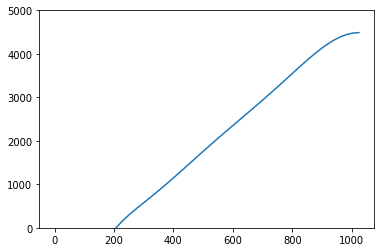

In [56]:
plt.ylim(0, 5000)
plt.plot(x, p)